# Step12 순차형(sequential) 모델
순차형 모델은 층(layer)을 차례로 쌓아 신경망(딥러닝) 모델을 생성한다.


순차형 모델의 생성, 학습, 평가 과정

1. Sequential 모델(model) 생성
2. 학습 환경(최적화, 손실함수, 성능지표)을 설정하고 model.fit()로 학습
-> 최적화 알고리즘은 손실을 최소화 하고, 학습이 되면 손실함수는 0으로 수렴한다.


4. 학습 결과는 가중치(weight)와 바이어스(bias)이다.
5. model.predict()와 model.evalute()로 모델을 예측하고 평가한다.

## step12_01
### 단순 선형 회귀: model=tf.keras.Sequential()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 60.3984 - 544ms/epoch - 109ms/step
Epoch 2/100
5/5 - 0s - loss: 42.6985 - 14ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 37.2841 - 17ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 34.7913 - 26ms/epoch - 5ms/step
Epoch 5/100
5/5 - 0s - loss: 32.7892 - 20ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 31.5817 - 19ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 28.5499 - 19ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 28.2827 - 21ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 24.9384 - 69ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 23.64

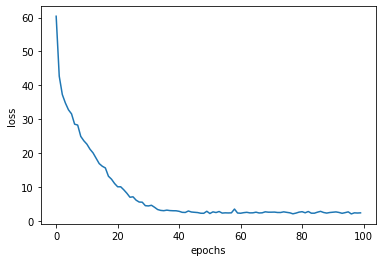

1/1 [==============================] - 0s 119ms/step


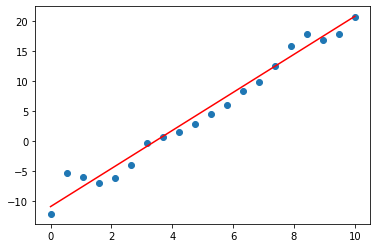

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# def dataset(train_size = 100):
#     np.random.seed(1)
#     x = np.linspace(0.0, 10.0, num=train_size)
#     #y = x ** 3 + x ** 2 + x + 4.0
    
#     y = 3.0 * x - 10.0
#     #y+= np.random.randn(train_size) * 2.0
#     y += np.random.normal(loc = 0.0, scale = 2.0, size=train_size)
#     return x,y

def dataset(train_size = 100):
    tf.random.set_seed(1)
    x = tf.linspace(0.0, 10.0, num = train_size)
    #y = x ** 3 + x ** 2 + x + 4.0
    y = 3.0 * x - 10.0 #3.0은 w, 10.0은 b. y는 목표값
    y += tf.random.normal([train_size], mean=0.0, stddev=2.0)
    return x, y

x, y_true = dataset(20)

model = tf.keras.Sequential()
#모델을 추가하는 과정
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
#units: 뉴런 갯수, input_dim=1 == input_shape=(1,): 1차원 입력 데이터  #p.88의 그림 12.3 참고
#Dense층을 생성해서 model에 추가한다. 예제의 계층 개수는 1개!

#model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=(1,))])
model.summary() #모델의 구조를 볼 수 있음

#최적화 객체를 생성
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') #optimizer=opt로 최적화 방법 설정, 손실함수는 mse로 설정했음
#model.compile(optimizer='sgd', loss='mse') #'sgd', 'adam', 'rmsprop'

#varbose
#0:silent(중간과정이 없음), 1:progress bar(bar도 보임), 2:one line per epoch(한줄씩)
ret = model.fit(x, y_true, epochs= 100, batch_size=4, verbose=2) #학습과정의 기록정보를 Historay 객체 ret에 저장한다.
#x:입력, y_true:정답/ batch_size: 20개에서 4개씩 샘플링
print("len(model.layers):", len(model.layers))

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print('weights:', model.layers[0].weights[0].numpy())
print('bias:', model.layers[0].weights[1].numpy())
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x) #예측값
plt.plot(x, y_pred, color='red')
plt.show()

## step12_02
### 2변수 선형 회귀: model=tf.keras.Sequential()

p.91의 그림 12.5 참고

Sequential 모델로 생성한 1층, 1뉴런을 갖는 2변수 선형모델의 신경망 구조!

Trainable params: 3(가중치2, 바이어스1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 1s - loss: 11.2543 - 859ms/epoch - 430ms/step
Epoch 2/100
2/2 - 0s - loss: 3.1771 - 41ms/epoch - 21ms/step
Epoch 3/100
2/2 - 0s - loss: 1.5976 - 21ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2144 - 34ms/epoch - 17ms/step
Epoch 5/100
2/2 - 0s - loss: 1.0431 - 25ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 1.0194 - 20ms/epoch - 10ms/step
Epoch 7/100
2/2 - 0s - loss: 0.8776 - 38ms/epoch - 19ms/step
Epoch 8/100
2/2 - 0s - loss: 0.7996 - 20ms/epoch - 10ms/step
Epoch 9/100
2/2 - 0s - loss: 0.7098 - 14ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 0.6367 

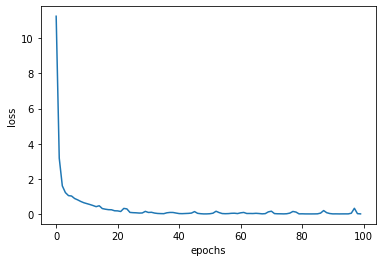

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## step12_03
### n차 다항식 회귀: model = tf.keras.Sequential()
n차 다항식 회귀를 위해서 X = np.ones(shape = (len(x), n+1), dtype=np.float32)로 모양이 (len(x), n+1)인 행렬을 생성한다.

예를 들어 [수식 12.4]는 n = 3일때, 0-열은 1.0, 1-열은 x, 2-열은 x**2, 3-열은 x**3으로 행렬 X를 생성한다.



[수식 12.4]

y = b + w1x + w2x^2 + w3x^3

y = WX

X = [1 x x^2 x^3]

W = [b w1 w2 w3]


p.93의 [그림 12.6] 참고

Sequentail 모델로 생성한 1층, 바이어스가 없는 1뉴런을 갖는 4변수 선형 모델의 뉴런 구조로 바이어스는 가중치에 포함된다.(Trainable parmas: 4(가중치 4)이다)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 2s - loss: 14056.0576 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 10069.9756 - 9ms/epoch - 9ms/step
Epoch 3/100
1/1 - 0s - loss: 7810.0078 - 9ms/epoch - 9ms/step
Epoch 4/100
1/1 - 0s - loss: 6247.4556 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 5080.2646 - 10ms/epoch - 10ms/step
Epoch 6/100
1/1 - 0s - loss: 4173.0161 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 3451.5508 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 2870.0508 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 2397.7820 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss

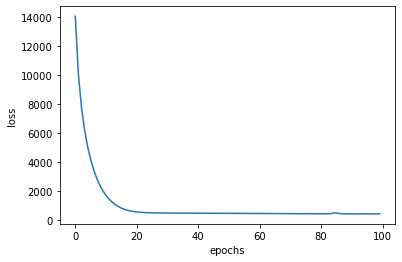

1/1 [==============================] - 0s 63ms/step


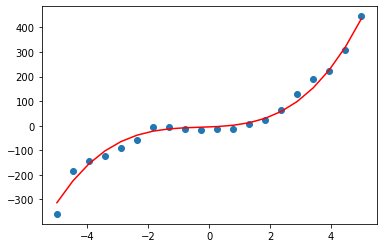

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False,input_shape=(n+1,))])
#1뉴런, n+1차원 입력 데이터를 갖는 Dense(완전연결)층을 생성.
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


# Step13 함수형 Model
함수형 모델은 tf.keras.layers.Input()로 입력층을 생성하고, tf.keras.layers.Dense() 계층을 생성한다.

입출력 관계를 직접 지정하며, tf.keras.Model()을 이용하여 모델의 입력층과 출력층을 지정하여 모델을 생성한다.

tf.keras.layers.Input()은 순차형 모델에서도 입력층으로 사용할 수 있다.


## step13_01
### 단순 선형 회귀: model = tf.keras.Model()
inputs: 1차원 입력을 위한 입력층

outputs: inputs과 뉴런(유닛)이 1개인 완전 연결 계층 outpus를 생성한다.
<br><br>

model=tf.keras.Model(inputs= inputs, output= outputs)처럼 지정을 해준다.
**즉, 층은 2개이며 len(model.layers)=2**

model.layers[0]: 입력층, model.layers[1]: 출력층 | **Trainable params는 2개(가중치 1, 바이어스 1)이다.**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 60.3984 - 743ms/epoch - 149ms/step
Epoch 2/100
5/5 - 0s - loss: 42.6985 - 27ms/epoch - 5ms/step
Epoch 3/100
5/5 - 0s - loss: 37.2841 - 64ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 34.7913 - 129ms/epoch - 26ms/step
Epoch 5/100
5/5 - 0s - loss: 32.7892 - 35ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 31.5817 - 37ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 28.5499 - 21ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 2

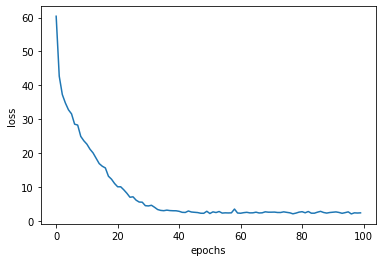

1/1 [==============================] - 0s 63ms/step


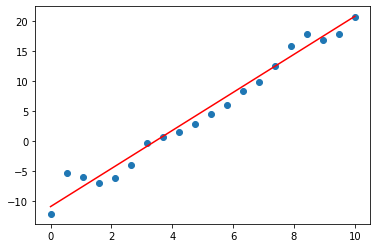

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)


#!! step12랑 다른 부분!
inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs) #입출력관계를 정해야한다!
model = tf.keras.Model(inputs=inputs, outputs=outputs) #입출력관계를 정해야한다!
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2) #2: one line per epoch 
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


## step13_02
### model=tf.keras.Model 2변수 선형 회귀
inputs: 2차원 입력을 위한 입력층 

outputs: inputs과 뉴런(유닛)이 1개인 완전 연결계층
<br><br><br>

입력층과 출력층의 2층을 갖고, len(model.layers)는 2이다.

model.layers[0]은 입력층, model.layers[1]은 출력층이다.

**Trainable parms는 3(가중치 2, 바이어스 1)이다.**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 1s - loss: 23.0136 - 629ms/epoch - 314ms/step
Epoch 2/100
2/2 - 0s - loss: 9.4867 - 6ms/epoch - 3ms/step
Epoch 3/100
2/2 - 0s - loss: 5.1184 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 3.2067 - 16ms/epoch - 8ms/step
Epoch 5/100
2/2 - 0s - loss: 2.3242 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 1.9122 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 1.7591 - 13ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 1.5421 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 1.3897 - 13ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 1.3048 - 13ms/epo

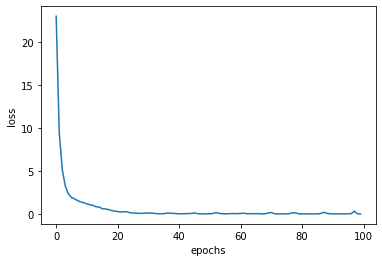

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## step13_03
### model = tf.keras.Model() n차 다항식 회귀
n차 다항식 회귀를 위해서 X = np.ones(shape = (len(x), n+1), dtype=np.float32)로 모양이 (len(x), n+1)인 행렬을 생성한다.

예를 들어 [수식 13.3]는 n = 3일때, 0-열은 1.0, 1-열은 x, 2-열은 x**2, 3-열은 x**3으로 행렬 X를 생성한다.



[수식 13.3]

y = b + w1x + w2x^2 + w3x^3

y = WX

X = [1 x x^2 x^3]

W = [b w1 w2 w3]


p.100의 [그림 13.3] 참고

n은 3일 때, tf.keras.Model()로 생성한 다항식 회귀 모델 신경망이다. 입력층과 출력층 총 2층을 갖습니다. 즉, len(model.layers)=2이다.

model.layers[0]은 입력층, model.layers[1]은 출력층, **Trainable parmas: 4(가중치)개이며, !!바이어스는 없다**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 1s - loss: 14056.0576 - 772ms/epoch - 772ms/step
Epoch 2/100
1/1 - 0s - loss: 10069.9756 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: 7810.0078 - 9ms/epoch - 9ms/step
Epoch 4/100
1/1 - 0s - loss: 6247.4556 - 14ms/epoch - 14ms/step
Epoch 5/100
1/1 - 0s - loss: 5080.2646 - 16ms/epoch - 16ms/step
Epoch 6/100
1/1 - 0s - loss: 4173.0161 - 13ms/epoch - 13ms/step
Epoch 7/100
1/1 - 0s - loss: 3451.5508 - 24ms/epoch - 24ms/step
Epoch 8/100
1/1 - 0s - loss: 2870.0508 - 20ms/epoch - 20ms/step
Epoch 9/100
1/1 - 0s - loss: 2397.7820 - 13ms/epoch - 13ms/step
Epoch 10/1

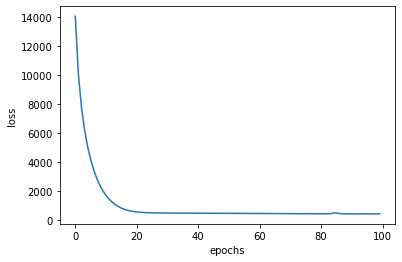

1/1 [==============================] - 0s 132ms/step


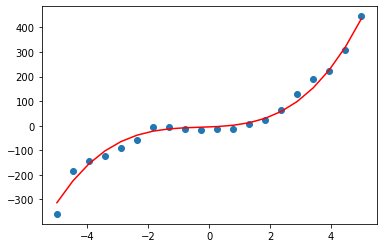

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False,input_shape=(n+1,))])
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()
